In [2]:
import numpy as np
import pyinterp
import pyinterp.backends.xarray

In [3]:
import sys


sys.path.append("../src/")

In [4]:
from sennet.core.mmap_arrays import read_mmap_array, create_mmap_array
import matplotlib.pyplot as plt
import numpy as np

In [5]:
image = read_mmap_array("/home/clay/research/kaggle/sennet/data_dumps/processed/kidney_1_dense/image")
label = read_mmap_array("/home/clay/research/kaggle/sennet/data_dumps/processed/kidney_1_dense/label/")

In [6]:
# grid = pyinterp.grid.Grid3D(
#     pyinterp.Axis(np.arange(image.data.shape[0])),
#     pyinterp.Axis(np.arange(image.data.shape[1])),
#     pyinterp.Axis(np.arange(image.data.shape[2])),
#     image.data,
# )

In [32]:
n_points = 512 * 512 * 8
random_i0 = np.random.randint(0, image.data.shape[0], size=n_points)
random_i1 = np.random.randint(0, image.data.shape[1], size=n_points)
random_i2 = np.random.randint(0, image.data.shape[2], size=n_points)

print(random_i0.shape, random_i1.shape, random_i2.shape)

(2097152,) (2097152,) (2097152,)


In [31]:
import time


t0 = time.time()
chunk = image.data[random_i0, random_i1, random_i2]
# for i, j, k in zip(random_i0, random_i1, random_i2):
    # _ = image.data[i, j, k]
t1 = time.time()
print(f"time: {t1 - t0}, {chunk.shape}")

time: 0.08645439147949219, (2097152,)


In [268]:
crop_size = 512
n_take_channels = 5

half_crop_size = crop_size/2
half_take_channels = n_take_channels/2

low_x = 100
low_y = 211
low_z = 500

center_x = low_x + crop_size/2
center_y = low_y + crop_size/2
center_z = low_z + n_take_channels/2

(
    pixels_z, 
    pixels_y, 
    pixels_x,
) = np.meshgrid(
    np.linspace(-0.5*n_take_channels, 0.5*n_take_channels, num=n_take_channels) if n_take_channels > 1 else np.zeros(n_take_channels),
    np.linspace(-0.5*crop_size, 0.5*crop_size, num=crop_size),
    np.linspace(-0.5*crop_size, 0.5*crop_size, num=crop_size),
    indexing="ij",
)
print(pixels_x.shape, pixels_y.shape, pixels_z.shape)
print(np.mean(pixels_x), np.mean(pixels_y), np.mean(pixels_z))

(5, 512, 512) (5, 512, 512) (5, 512, 512)
-1.4210854715202004e-14 -1.1723955140041652e-14 0.0


In [269]:
from scipy.spatial.transform import Rotation

(5, 512, 512)


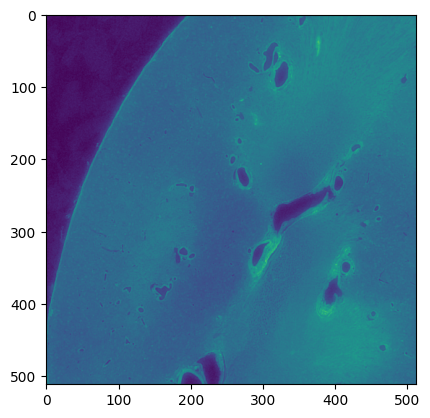

In [270]:
og_image = image.data[
    low_z: low_z+n_take_channels,
    low_y: low_y+crop_size,
    low_x: low_x+crop_size,
]
print(og_image.shape)
plt.imshow(og_image[0])

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
0.04637956619262695
(5, 512, 512)


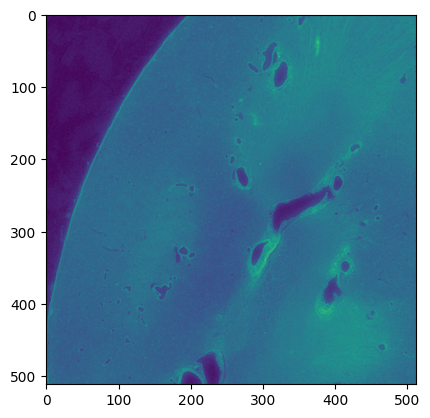

In [271]:
# rot = Rotation.from_rotvec(np.random.uniform(-np.pi, np.pi, 3)).as_matrix()
rot = Rotation.from_rotvec(np.array([0, 0, 0])).as_matrix()
# rot = Rotation.from_rotvec(np.array([0.0, np.pi/2, 0.0])).as_matrix()
# rot = Rotation.from_rotvec(np.array([0.0, 1.4, 0.0])).as_matrix()
print(rot)

t0 = time.time()
n_rotated_pixels_x = rot[0, 0]*pixels_x + rot[0, 1]*pixels_y + rot[0, 2]*pixels_z
n_rotated_pixels_y = rot[1, 0]*pixels_x + rot[1, 1]*pixels_y + rot[1, 2]*pixels_z
n_rotated_pixels_z = rot[2, 0]*pixels_x + rot[2, 1]*pixels_y + rot[2, 2]*pixels_z
z_rotated_pixels_x = n_rotated_pixels_x + center_x
z_rotated_pixels_y = n_rotated_pixels_y + center_y
z_rotated_pixels_z = n_rotated_pixels_z + center_z

aug_image = image.data[
    np.round(z_rotated_pixels_z).astype(int),
    np.round(z_rotated_pixels_y).astype(int),
    np.round(z_rotated_pixels_x).astype(int),
]

t1 = time.time()
print(t1-t0)
print(aug_image.shape)
plt.imshow(aug_image[0])

[[ 1.          0.          0.        ]
 [ 0.          0.36235775 -0.93203909]
 [ 0.          0.93203909  0.36235775]]
0.0290985107421875
(5, 512, 512)


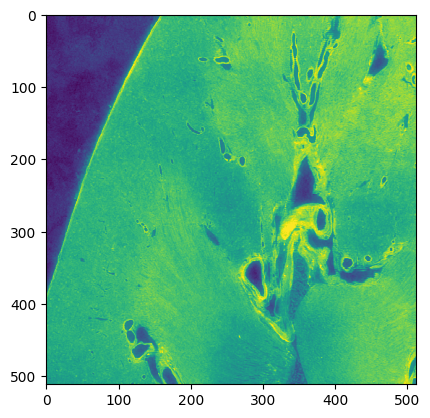

In [279]:
# rot = Rotation.from_rotvec(np.random.uniform(-np.pi, np.pi, 3)).as_matrix()
# rot = Rotation.from_rotvec(np.array([0, 0, 0])).as_matrix()
# rot = Rotation.from_rotvec(np.array([0, 0, 0.2])).as_matrix()
# rot = Rotation.from_rotvec(np.array([0.0, np.pi/2, 0.0])).as_matrix()
rot = Rotation.from_rotvec(np.array([1.2, 0.0, 0.0])).as_matrix()
print(rot)

t0 = time.time()
n_rotated_pixels_x = rot[0, 0]*pixels_x + rot[0, 1]*pixels_y + rot[0, 2]*pixels_z
n_rotated_pixels_y = rot[1, 0]*pixels_x + rot[1, 1]*pixels_y + rot[1, 2]*pixels_z
n_rotated_pixels_z = rot[2, 0]*pixels_x + rot[2, 1]*pixels_y + rot[2, 2]*pixels_z
rotated_pixels_x = n_rotated_pixels_x + center_x
rotated_pixels_y = n_rotated_pixels_y + center_y
rotated_pixels_z = n_rotated_pixels_z + center_z

aug_image = image.data[
    np.round(rotated_pixels_z).astype(int),
    np.round(rotated_pixels_y).astype(int),
    np.round(rotated_pixels_x).astype(int),
]

t1 = time.time()
print(t1-t0)
print(aug_image.shape)
plt.imshow(np.clip(aug_image[0], 0, aug_image[0].mean() + 2*aug_image[0].std()))

In [273]:
import pyvista as pv

In [274]:
poly = pv.PolyData(
    np.stack((
        pixels_x.flatten(), 
        pixels_y.flatten(), 
        pixels_z.flatten(),
    ), axis=1),
)
poly.plot(notebook=False, show_grid=True, point_size=1)

In [260]:
poly = pv.PolyData(
    np.stack((
        np.concatenate([rotated_pixels_x.flatten(), z_rotated_pixels_x.flatten()], axis=0), 
        np.concatenate([rotated_pixels_y.flatten(), z_rotated_pixels_x.flatten()], axis=0), 
        np.concatenate([rotated_pixels_z.flatten(), z_rotated_pixels_x.flatten()], axis=0)
    ), axis=1),
)
poly.plot(notebook=False, show_grid=True, point_size=1, render_points_as_spheres=True)

In [261]:
poly = pv.PolyData(
    np.stack((
        z_rotated_pixels_x.flatten(), 
        z_rotated_pixels_y.flatten(), 
        z_rotated_pixels_z.flatten(),
    ), axis=1),
)
poly.plot(notebook=False, show_grid=True, point_size=1)

In [262]:
poly = pv.PolyData(
    np.stack((
        rotated_pixels_x.flatten(), 
        rotated_pixels_y.flatten(), 
        rotated_pixels_z.flatten(),
    ), axis=1),
)
poly.plot(notebook=False, show_grid=True, point_size=1)